# Step 0: Explore the dataset

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fecha_resultado     1124 non-null   object
 1   departamento        1124 non-null   object
 2   num_death_cases     1124 non-null   int64 
 3   num_positive_cases  1124 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 35.2+ KB


<Axes: >

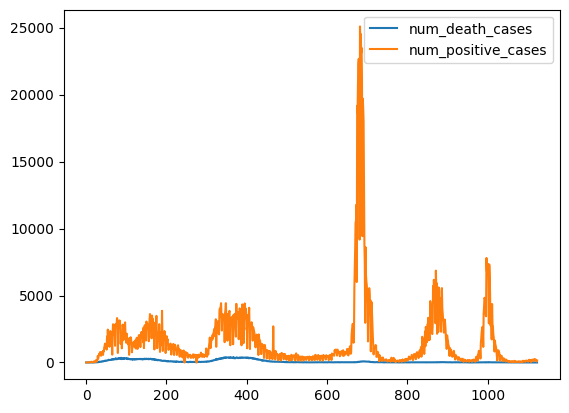

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DSA5900/LIMA_DEPARTMENT.csv')
df.info()

df.plot()

In [4]:
df['fecha_resultado'] = pd.to_datetime(df['fecha_resultado'], format='%Y/%m/%d')

In [5]:
df['Year'] = df['fecha_resultado'].dt.year
df['Month'] = df['fecha_resultado'].dt.month
df['Day'] = df['fecha_resultado'].dt.day
df['ds'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [6]:
df.drop(['fecha_resultado', 'departamento','num_positive_cases', 'Year', 'Month', 'Day', ], axis=1, inplace= True)
df.columns = ['y', 'ds']

In [7]:
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

In [8]:
df['y'] = df['y'].cumsum()


<Axes: xlabel='ds'>

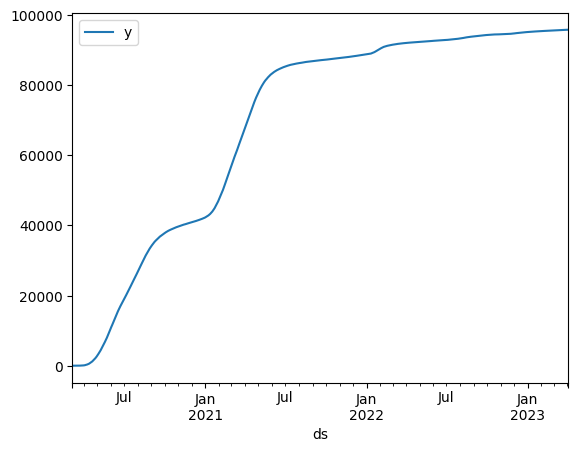

In [9]:
import numpy as np
#df = np.log(df['y']) # don't forget to transform the data back when making real predictions

df.plot()

In [10]:
df

,y
ds,
2020-03-06,0
2020-03-07,0
2020-03-08,0
2020-03-09,0
2020-03-10,0
...,...
2023-03-30,95792
2023-03-31,95797
2023-04-01,95801


In [12]:
# msk = (df.index < len(df)-30)
# df_train = df[msk].copy()
# df_test = df[~msk].copy()

# Splitting the data into training and testing sets
train_size = int(len(df['y']) * 0.8)
df_train = df['y'][:train_size]
df_test = df['y'][train_size:]
len(df_test)

225

# Step 1: Check for stationarity of time series

## Method #1: time series plot

## Method #2: ACF plot and PACF plot

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


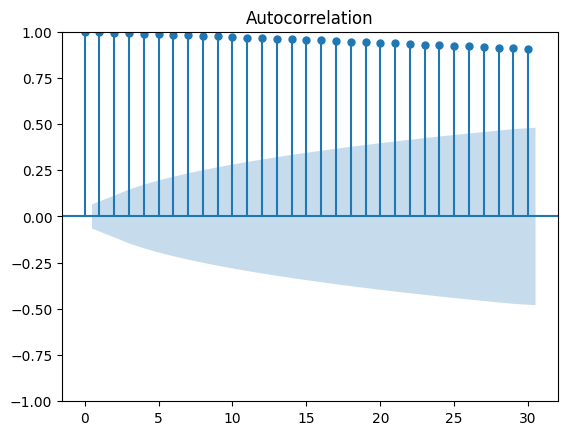

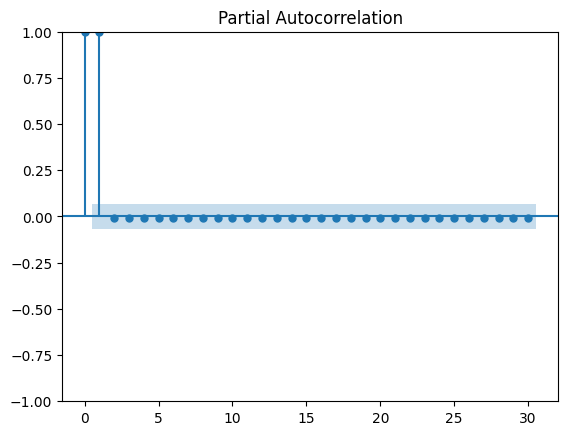

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

## Method #3: ADF test

In [14]:
# from statsmodels.tsa.stattools import adfuller
# adf_test = adfuller(df_train)
# print(f'p-value: {adf_test[1]}')

p-value: 0.022262236555448667


## Transform to stationary: differencing

In [15]:
# df_train_diff = df_train.diff().dropna()
# df_train_diff.plot()

In [16]:
# acf_diff = plot_acf(df_train_diff)

# pacf_diff = plot_pacf(df_train_diff)

In [ ]:
# adf_test = adfuller(df_train_diff)
# print(f'p-value: {adf_test[1]}')

p-value: 0.18942482498922109


# Step 2: Determine ARIMA models parameters p, q

# Step 3: Fit the ARIMA model

In [94]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(17,0,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  899
Model:                ARIMA(17, 0, 0)   Log Likelihood               -3534.946
Date:                Thu, 27 Apr 2023   AIC                           7107.893
Time:                        08:53:19   BIC                           7199.117
Sample:                    03-06-2020   HQIC                          7142.743
                         - 08-21-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.292e+04    1.2e-05   5.25e+09      0.000    6.29e+04    6.29e+04
ar.L1          1.3150      0.023     57.160      0.000       1.270       1.360
ar.L2         -0.1970      0.037     -5.357      0.0

# Step 4: Make time series predictions

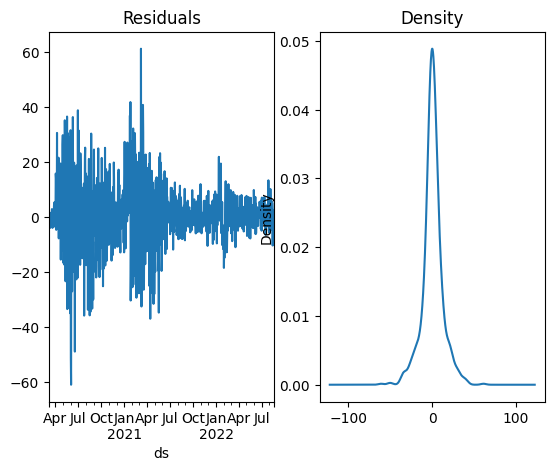

In [95]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


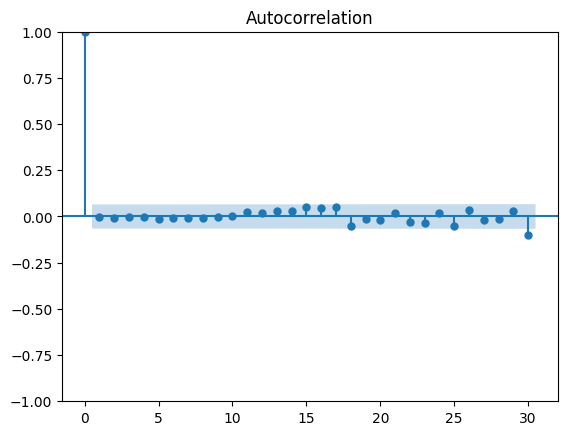

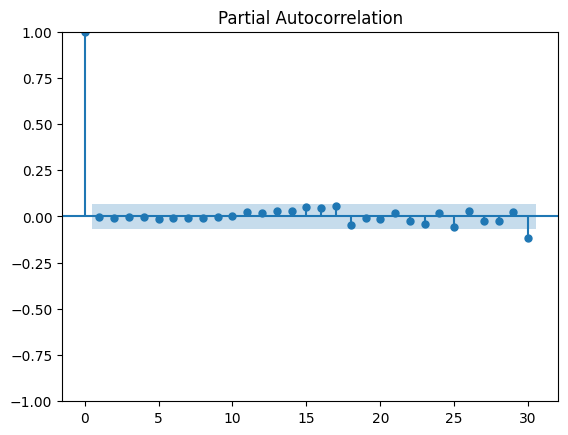

In [96]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: xlabel='ds'>

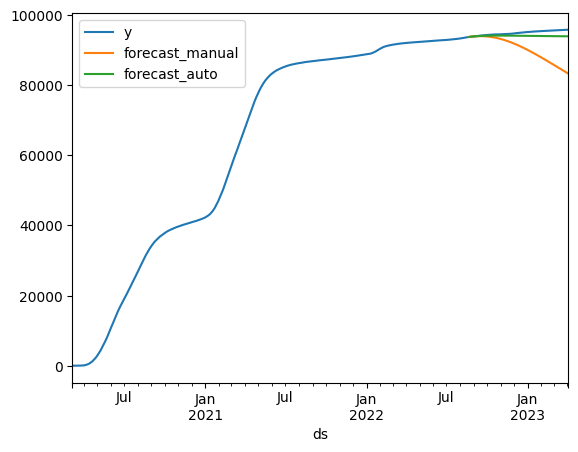

In [97]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

# Optional: Auto-fit the ARIMA model

In [98]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 2, 3), scoring_args={}, suppress_warnings=True)

In [99]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  899
Model:               SARIMAX(2, 2, 3)   Log Likelihood               -3524.406
Date:                Thu, 27 Apr 2023   AIC                           7062.811
Time:                        08:54:09   BIC                           7096.405
Sample:                    03-06-2020   HQIC                          7075.646
                         - 08-21-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.048      0.007      0.994      -0.094       0.095
ar.L1          0.1454      0.049      2.945      0.003       0.049       0.242
ar.L2          0.7913      0.049     16.058      0.000       0.695       0.888
ma.L1         -0.8546      0.046    -18.726      0.000      -0.944      -0.765
ma.L2         -0.7556      0.072    -10.423      0.000      -0.898      -0.614
ma.L3          0.7219      0.035     20.592      0.000       0.653       0.791
sigma2       151.1155      4.598     32.868      0.000     142.104     160.127
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               384.40
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Step 5: Evaluate model predictions

<Axes: xlabel='ds'>

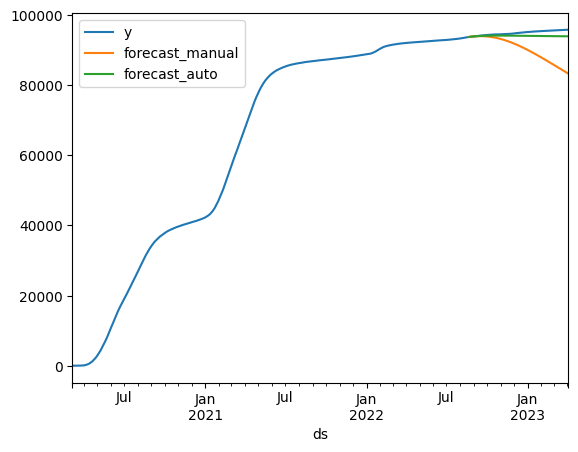

In [100]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

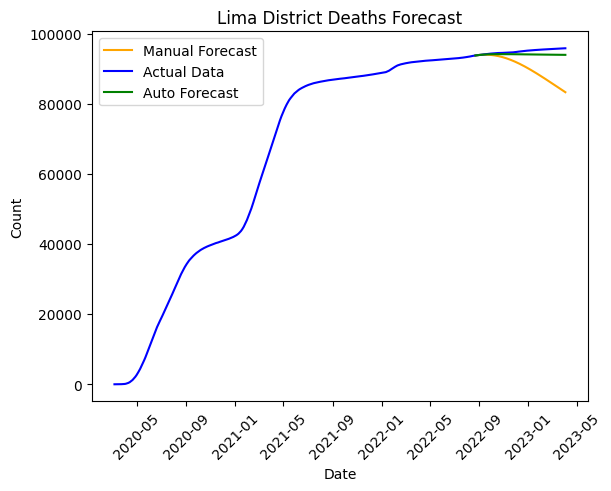

In [101]:
plt.figure()
plt.plot(df[['forecast_manual']], c='orange', label='Manual Forecast')
plt.plot(df[['y']], c='blue', label='Actual Data')
plt.plot(df[['forecast_auto']], c='green', label='Auto Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.title("Lima District Deaths Forecast")
plt.legend()
plt.show()

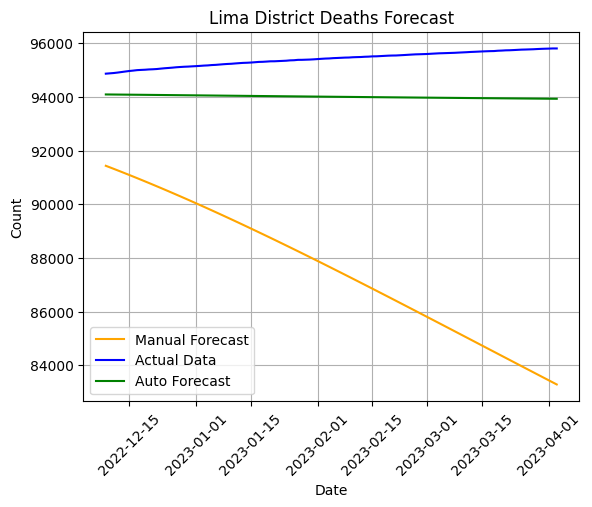

In [102]:
plt.figure()
plt.plot(df[['forecast_manual']][-116:], c='orange', label='Manual Forecast')
plt.plot(df[['y']][-116:], c='blue', label='Actual Data')
plt.plot(df[['forecast_auto']][-116:], c='green', label='Auto Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.title("Lima District Deaths Forecast")
plt.legend()
plt.grid()
plt.show()

In [103]:
# Arima Department Deaths Error (Manual Forecast)
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

#print(df_test.mean())
print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

df_test_mean= df_test.mean()
print(f"Mean: {df_test_mean}")
print(f"RMSE percentage: {((rmse/df_test_mean)*100)}%")

mae - manual: 4573.609478038622
mape - manual: 0.047944183578060864
rmse - manual: 6051.517201183181
Mean: 94901.03111111111
RMSE percentage: 6.376661170412366%


In [104]:
# Arima Department Deaths Error (Automatic Forecast)
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

#print(df_test.mean())
print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

df_test_mean= df_test.mean()
print(f"Mean: {df_test_mean}")
print(f"RMSE percentage: {((rmse/df_test_mean)*100)}%")

mae - auto: 864.5152669975489
mape - auto: 0.00907002598102049
rmse - auto: 1060.222954653653
Mean: 94901.03111111111
RMSE percentage: 1.1171880244507912%


# Other suggestions